In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
np.random.seed(47)

Define function, gradient estimates

In [ ]:
def f(x, deg):
  z = np.where(abs(x)<= 1, abs(x)**deg, 1.0+deg*(abs(x)-1.0))
  return(z)

def df(x, deg):
  z = np.where(abs(x)<= 1, deg*abs(x)**(deg-2)*x, deg*x /abs(x))
  return(z)

def g(x,sigma, deg):
  return df(x, deg)*(1+np.random.normal(0,sigma, x.size))

Runnign simulations

In [ ]:
def run_plot(deg,sigma):
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("Current state: sigma = "+str(sigma)+", degree = "+str(deg)+ ", time = "+str(current_time))
    L = deg * (deg -1)
    eta = 1/(L*(1+2*sigma**2))
    gamma = 1

    R = (1+sigma**2)
    alpha = eta/R
    #n0 = 2*R

    mean=np.zeros(T)
    meangd=np.zeros(T)
    meannest=np.zeros(T)

    x = np.ones(noofruns)
    xgd = np.ones(noofruns)
    xnest = np.ones(noofruns)
    xnestprev = np.ones(noofruns)
    ynest = np.ones(noofruns)
    v = np.zeros(noofruns)

    val = np.zeros(noofruns)
    valgd = np.zeros(noofruns)
    valnest = np.zeros(noofruns)

    for n in range(T):
      if n%50000 ==0:
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("   Time is " +str (current_time) + ", steps = ",n)
      for i in range(effectiveruns):
        xcurrent = x[range(int(i*batchsize), int((i+1)*batchsize))]
        vcurrent = v[range(int(i*batchsize), int((i+1)*batchsize))]
        val[range(int(i*batchsize), int((i+1)*batchsize))] = f(xcurrent, deg)
        xprime = xcurrent + alpha*vcurrent
        rho = (n)/(n+5)
        grad = g(xprime,sigma, deg)
        v[range(int(i*batchsize), int((i+1)*batchsize))] = rho*(vcurrent-gamma*grad)
        x[range(int(i*batchsize), int((i+1)*batchsize))] = xprime - eta*grad

        xcurrent = xgd[range(int(i*batchsize), int((i+1)*batchsize))]
        valgd[range(int(i*batchsize), int((i+1)*batchsize))] = f(xcurrent, deg)
        gdgrad = g(xcurrent, sigma, deg)
        xgd[range(int(i*batchsize), int((i+1)*batchsize))] = xcurrent - eta * gdgrad

        xcurrent = xnest[range(int(i*batchsize), int((i+1)*batchsize))]
        ycurrent = ynest[range(int(i*batchsize), int((i+1)*batchsize))]
        valnest[range(int(i*batchsize), int((i+1)*batchsize))] = f(xcurrent, deg)
        rhonest = (n)/(n+3)
        nestgrad = g(ycurrent, sigma, deg)
        xnestprev = xcurrent
        xnest[range(int(i*batchsize), int((i+1)*batchsize))] = ycurrent - eta* nestgrad
        ynest[range(int(i*batchsize), int((i+1)*batchsize))] = xnest[range(int(i*batchsize), int((i+1)*batchsize))] + rhonest * (xnest[range(int(i*batchsize), int((i+1)*batchsize))] - xnestprev)
      mean[n]=np.mean(val)
      meangd[n]=np.mean(valgd)
      meannest[n]=np.mean(valnest)
    return(mean, meangd, meannest)


Running and plotting

In [ ]:
globalnoofruns = 200 #for averaging over randomness
golablbatchsize= globalnoofruns

T = 100000 #number of steps the algorithm takes
sigmas = [0, 10, 50]
degs = [4,16]

means = np.zeros(shape = [len(degs), len(sigmas), T])
meansgd = np.zeros(shape = [len(degs), len(sigmas), T])
meansnest = np.zeros(shape = [len(degs), len(sigmas), T])

for i in range(len(degs)):
  for j in range (len(sigmas)):
    deg = degs[i]
    sigma = sigmas[j]
    if sigma ==0:
      noofruns = 1
      batchsize=1
    else:
      noofruns = globalnoofruns
      batchsize=golablbatchsize
    effectiveruns = int(noofruns/batchsize)
    means[i,j,:], meansgd[i,j,:], meansnest[i,j,:] = run_plot(deg, sigma)

np.save('convex_data_means.npy', means)
np.save('convex_data_meansgd.npy', meansgd)
np.save('convex_data_meansnest.npy', meansnest)

Current state: sigma = 0, degree = 4, time = 22:44:02
   Time is 22:44:02, steps =  0
   Time is 22:44:25, steps =  50000
Current state: sigma = 10, degree = 4, time = 22:44:39
   Time is 22:44:39, steps =  0
   Time is 22:45:13, steps =  50000
Current state: sigma = 50, degree = 4, time = 22:45:44
   Time is 22:45:44, steps =  0
   Time is 22:46:18, steps =  50000
Current state: sigma = 0, degree = 16, time = 22:46:52
   Time is 22:46:52, steps =  0
   Time is 22:47:07, steps =  50000
Current state: sigma = 10, degree = 16, time = 22:47:22
   Time is 22:47:22, steps =  0
   Time is 22:47:55, steps =  50000
Current state: sigma = 50, degree = 16, time = 22:48:29
   Time is 22:48:29, steps =  0
   Time is 22:49:03, steps =  50000


Plotting only

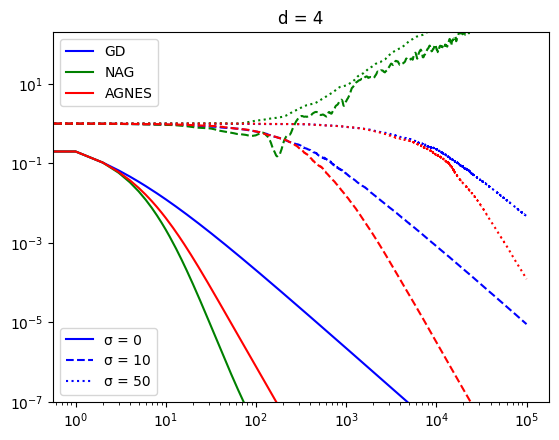

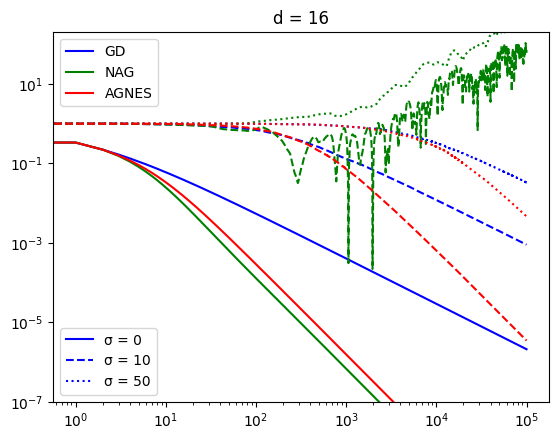

In [ ]:
for i in range(len(degs)):
  plt.figure()
  plt.title("d = "+str(degs[i]))
  plt.ylim(bottom = 1e-7, top = 2e2)
  gdsig0, = plt.loglog(meansgd[i,0, :], color = 'blue')  #label = "GD, sigma = "+str(sigmas[0])
  gdsig1, = plt.loglog(meansgd[i,1, :],color = 'blue', linestyle = '--') #label = "GD, sigma = "+str(sigmas[1])
  gdsig2, = plt.loglog(meansgd[i,2, :],color = 'blue', linestyle = ':') #label = "GD, sigma = "+str(sigmas[2])

  nasig0, = plt.loglog(meansnest[i,0, :], color = 'green') #label = "NAG, sigma = "+str(sigmas[0])
  plt.loglog(meansnest[i,1, :],color = 'green', linestyle = '--', label = "NAG, sigma = "+str(sigmas[1]))
  plt.loglog(meansnest[i,2, :],color = 'green', linestyle = ':', label = "NAG, sigma = "+str(sigmas[2]))

  agsig0, = plt.loglog(means[i,0, :], color = 'red') #label = "AGNES, sigma = "+str(sigmas[0])
  plt.loglog(means[i,1, :], color = 'red', linestyle = '--') #label = "AGNES, sigma = "+str(sigmas[1])
  plt.loglog(means[i,2, :], color ='red', linestyle = ':') #label = "AGNES, sigma = "+str(sigmas[2])


  #plt.legend()
  sigma_labels = ["σ = "+str(sigma) for sigma in sigmas]
  legend1 = plt.legend([gdsig0, gdsig1, gdsig2], sigma_labels, loc=3)
  plt.legend([gdsig0, nasig0], ["GD", "NAG"], loc=2)
  plt.legend([gdsig0, nasig0, agsig0], ["GD", "NAG", "AGNES"], loc=2)
  plt.gca().add_artist(legend1)